## 15.2- Caso de Estudio - Clasificación

### 15.2.1.- Cargar el dataset

Carga load_digits desde sklearn.datasets y luego metelo en un objeto

In [52]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)


In [7]:
from sklearn.datasets import load_digits

Imprime la descripcion del dataset

In [8]:
digits=load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


In [9]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Checa el target de tu nuevo objeto digitos

In [10]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

Ahora prueba revisando la forma del arreglo digitos

In [11]:
digits.data.shape

(1797, 64)

Y la forma del arreglo target

In [12]:
digits.target.shape

(1797,)

Vamos revisando la imagen 15 del arreglo... no es lo que esperas

In [13]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

y ahora veamos el .data para ver el arreglo en 1x64

In [14]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

### 15.2.2.- Visualizar los datos

Veamos los datos utilizando matplotlib, comienza importando esta libreria

In [15]:
import matplotlib.pyplot as plt

Ahor adibuja una cuadricula para lograr tu cometido

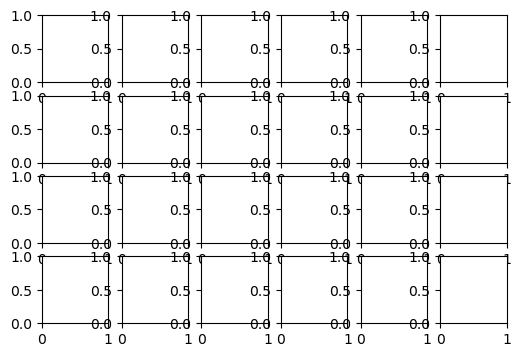

In [16]:
figure,axes=plt.subplots(nrows=4,ncols=6, figsize=(6,4))

a continuación, vamos a usar un for paraiterar en paralelo a traves de los 24 cuadritos y traer las priemras 24 imagenes

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

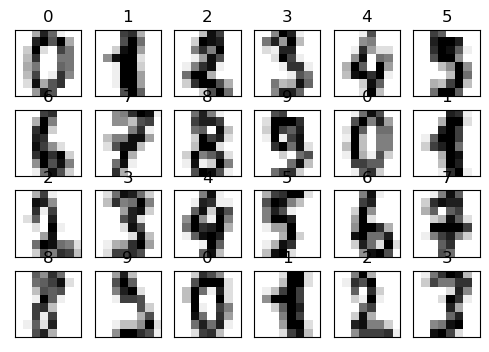

In [17]:
figure,axes=plt.subplots(nrows=4,ncols=6, figsize=(6,4))
for item in zip(axes.ravel(), digits.images, digits.target):
    axes,image, target = item
    axes.imshow(image,cmap=plt.cm.gray_r)
    axes.set_xticks([])
    axes.set_yticks([])
    axes.set_title(target)
plt.tight_layout

### 15.2.3.- Separar el dataset para entrenamientos y pruebas

ok, ahora vamos a importar train_test_split desde sklearn.model_selection

In [18]:
from sklearn.model_selection import train_test_split

Y a continuación generar el split entre test y train

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(digits.data, digits.target, random_state=11)

Veamos las shapes de nuestros sets para X (muestras)

In [20]:
xtrain.shape

(1347, 64)

In [21]:
xtest.shape

(450, 64)

### 15.2.4.- Crear el modelo

Ahora importamos el KNeighborsClassifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier as kn

y armamos un objeto llamado KNN de este Clasificador

In [23]:
knn = kn()

### 15.2.5.- Entrenar el modelo

Ahora arma el método fit para cargar los datos en el estimador

In [24]:
knn.fit(X=xtrain, y=ytrain)

KNeighborsClassifier()

### 15.2.6.- Predecir clases de dígitos

Arma un objeto llamdo prediccion

In [25]:
prediccion = knn.predict(X=xtest)

/home/lenin/apps/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Arma un objeto llamado esperado

In [26]:
esperado = ytest

Comparemos predicho vs esperado

In [27]:
prediccion[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 5, 6])

In [28]:
esperado[:20]

array([0, 4, 9, 9, 3, 1, 4, 1, 5, 0, 4, 9, 4, 1, 5, 3, 3, 8, 3, 6])

armamos una comprension de lista para localizar todas las predicciones incorrectas

In [29]:
equivocados = [(p,e) for (p,e) in zip(prediccion,esperado) if p!=e]

In [30]:
equivocados

[(5, 3),
 (8, 9),
 (4, 9),
 (7, 3),
 (7, 4),
 (2, 8),
 (9, 8),
 (3, 8),
 (3, 8),
 (1, 8)]

## 15.3 Clasificación parte 2 - Dataset de digitos

### 15.3.1.- Metricas para la exactitud del modelo

Usa knn.score para conocer que tan bien se desempeño tu estimador

In [31]:
print(f'{knn.score(xtest, ytest):.2%}')

97.78%


/home/lenin/apps/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Ahora vamos a ahacer una matriz de confusion para ver los hits y misses para una clase dada, llama la funcion matriz de confusión desde sklearn metricsModule

In [32]:
from sklearn.metrics import confusion_matrix

Y ahora armar tu matriz de confusion

In [33]:
confusion = confusion_matrix(y_true=esperado, y_pred=prediccion)

Checa los resultados

In [34]:
confusion

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 49,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 45,  0,  0],
       [ 0,  1,  1,  2,  0,  0,  0,  0, 39,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 41]])

Ahora sigue un reporte de calsificación, importa classification_report desde sklearn.metrics

In [35]:
from sklearn.metrics import classification_report as rep

Y ahora crea una comprension de lista que nos de los nombres de los digitos

In [36]:
nombres = [str(digit) for digit in digits.target_names]
nombres

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Y termina haciendo tu reporte de clasificacion

In [37]:
print(rep(esperado, prediccion, target_names=nombres))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.98      1.00      0.99        45
           2       0.98      1.00      0.99        54
           3       0.95      0.95      0.95        44
           4       0.98      0.98      0.98        50
           5       0.97      1.00      0.99        38
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        45
           8       0.97      0.89      0.93        44
           9       0.98      0.95      0.96        43

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [38]:
import pandas as pd
import seaborn as sns

Y ahora ahremos un heatmap con la matriz de confusion

In [39]:
confusiondf = pd.DataFrame(confusion, index=range(10), columns=range(10))

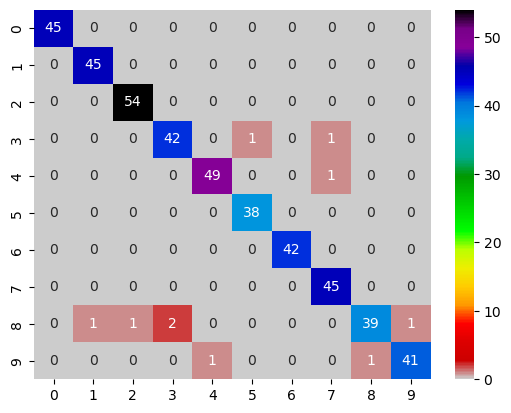

In [40]:
axes = sns.heatmap(confusiondf, annot=True, cmap='nipy_spectral_r')

### 15.3.2.- K-Fold Validación Cruzada

Importa kfold desde sklearn.modelselection

In [41]:
from sklearn.model_selection import KFold

Crea tu primer objeto kfold

In [42]:
kfold = KFold(n_splits=10, random_state=11, shuffle=True)

Ahora importa cross_val_score

In [43]:
from sklearn.model_selection import cross_val_score

Y crea un objeto llamado puntuacion para probar tu modelo

In [53]:
puntuacion = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)

Checa los resultados

In [45]:
puntuacion

array([0.97777778, 0.99444444, 0.98888889, 0.97777778, 0.98888889,
       0.99444444, 0.97777778, 0.98882682, 1.        , 0.98882682])

In [46]:
puntuacion.mean()

0.9877653631284916

In [47]:
puntuacion.std()

0.007368447328906141

### 15.3.3.- Varios Modelos hasta dar con el bueno

Importa SVC y GaussianNB

In [49]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Crea los estimadores en un diccionario

In [50]:
estimadores = {'KNeighborsClassifier':knn, 'SVC':SVC(gamma='scale'), 'GaussianNB':GaussianNB()}

Ejecuta los modelos con un for

In [54]:
for nom_est, ob_est in estimadores.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    puntuacion = cross_val_score(estimator=ob_est, X=digits.data, y=digits.target, cv=kfold)
    print(f'{nom_est:>20} puntuacion promedio = {puntuacion.mean():.2%} desviacion estandar = {puntuacion.std():.2%}')

KNeighborsClassifier puntuacion promedio = 98.78% desviacion estandar = 0.74%
                 SVC puntuacion promedio = 98.72% desviacion estandar = 0.79%
          GaussianNB puntuacion promedio = 84.48% desviacion estandar = 3.47%


### 15.3.3.- Ajustar Hiperparametros

Ajusta el hiperparametro para ver si alguno nos da mejor exactitud

In [55]:
for k in range(1,20,2):
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    knn = kn(n_neighbors=k)
    puntuacion = cross_val_score(estimator=knn, X=digits.data, y=digits.target, cv=kfold)
    print(f'k={k:<20} puntuacion promedio = {puntuacion.mean():.2%} desviacion estandar = {puntuacion.std():.2%}')

k=1                    puntuacion promedio = 98.83% desviacion estandar = 0.58%
k=3                    puntuacion promedio = 98.83% desviacion estandar = 0.72%
k=5                    puntuacion promedio = 98.78% desviacion estandar = 0.74%
k=7                    puntuacion promedio = 98.44% desviacion estandar = 0.96%
k=9                    puntuacion promedio = 98.39% desviacion estandar = 0.80%
k=11                   puntuacion promedio = 98.33% desviacion estandar = 0.90%
k=13                   puntuacion promedio = 97.89% desviacion estandar = 0.89%
k=15                   puntuacion promedio = 97.83% desviacion estandar = 0.95%
k=17                   puntuacion promedio = 97.50% desviacion estandar = 1.00%
k=19                   puntuacion promedio = 97.66% desviacion estandar = 0.96%


## 15.4 Series de tiempo y simple regresión lineal

Importa pandas si no lo has hecho, carga los datos de casas

In [56]:
import pandas as pd

In [57]:
kc_house = pd.read_csv('kc_house_data.csv')

Dale nombre a las columnas del dataframe

In [58]:
kc_house.columns=['area','precio']

Muestra los primeros 20 datos

In [59]:
kc_house.head(20)

,area,precio
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
5,5420,1230000.0
6,1715,257500.0
7,1060,291850.0
8,1780,229500.0
9,1890,323000.0


usemos train test split para training y pruebas

In [ ]:
from sklearn.model_selection import train_test_split

In [62]:
x_train, x_test, y_train, y_test = train_test_split(kc_house.area.values.reshape(-1,1), kc_house.precio.values.reshape(-1,1), random_state=11)

Chequemos los tamaños de train y test

In [63]:
print(x_train.shape)
print(x_test.shape)

(16209, 1)
(5404, 1)


importa LinearRegression de sklearn

In [64]:
from sklearn.linear_model import LinearRegression

Arma el estimador y haz el fit

In [65]:
reglin = LinearRegression()

In [66]:
reglin.fit(X=x_train, y=y_train)

LinearRegression()

Obten el Coef y el INtercept

In [67]:
reglin.coef_
# por cada ft la casa aumenta su precio en:

array([[283.3312025]])

In [68]:
reglin.intercept_
# el precio en negativo hasta tener la cantidad suficiente de ft

array([-47648.88872214])

Probemos el modelo, crea los objetos prediccion y esperado

In [69]:
prediccion = reglin.predict(x_test)

Arma un ciclo que muestre p vs e para los datos de 5 en 5

In [76]:
for p, e in zip(prediccion[::100], y_test[::100]):
    print(f'{p}  {e}')

[264015.43402447]  [343566.]
[519013.5162717]  [433000.]
[623846.06119556]  [530000.]
[782511.53459383]  [650880.]
[510513.58019679]  [499000.]
[459513.96374734]  [402200.]
[295748.52870413]  [340000.]
[530346.76437157]  [575000.]
[221515.75364993]  [137000.]
[439680.77957256]  [770000.]
[660679.11752016]  [646000.]
[326348.29857379]  [260000.]
[884510.76749272]  [775000.]
[986510.00039161]  [550000.]
[584179.69284599]  [334950.]
[278181.99414932]  [420000.]
[349014.79477355]  [230000.]
[836344.46306825]  [1960000.]
[298015.1783241]  [940000.]
[545929.9805089]  [670000.]
[533180.07639654]  [353500.]
[521846.82829667]  [627800.]
[638012.6213204]  [380000.]
[462347.27577231]  [610000.]
[538846.70044648]  [880000.]
[269682.05807441]  [380950.]
[445347.4036225]  [580000.]
[932677.0719172]  [730000.]
[402847.72324796]  [274000.]
[618179.43714562]  [510000.]
[419847.59539778]  [610000.]
[247015.56187466]  [225000.]
[397181.09919802]  [998500.]
[198849.25745018]  [395000.]
[346181.48274858]  

Vamos a predecir precios de casas usando area en sqft

In [77]:
predice = (lambda x: reglin.coef_*x + reglin.intercept_)

In [78]:
predice(770)

array([[170516.13720049]])

Y ahora visaulizemos la regresion lineal con seaborn

In [79]:
import seaborn as sns

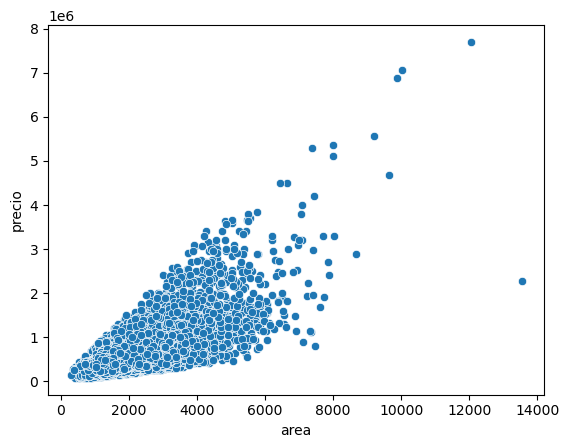

In [80]:
axes = sns.scatterplot(data = kc_house, x='area', y='precio')

## 15.5 Regresion lineal multiple con los datos de California

### 15.5.1 Cargar el dataset

### 15.5.2 Explorar los datos

Importa Pandas si no lo has hecho, altera las precisiones a 4, max columns a 9 y display width a none

Carga los datos de california en un dataframe

Agrega el target de california al mismo dataframe como una columna (Serie) adicional

Checa el head de california

Hagamos un describe para ver que onda

### 15.5.3 Visualizar los datos

Vamos a armar un muestreo del 10% del dataset para ver mas facil las visualizaciones

Importa Matplotlib

IMporta Seaborn

Cambia la fuente de seaborn

Ponlo tipo Whitegrid

Arma graficas de precio vs cada feature

### 15.5.4 Separar los datos para training y pruebas

Importa de sklearn.model_selection el train_test_split

Arma tu train test split

Checa las figura de train

Checa la figura de test

### 15.5.5 Entrenar el modelo

Importa LinearRegression desde sklearn.linear_model

arma tu objeto reglin

Haz el fit

Arma tu for para enumerar todos los coeficientes

Obten el intercept

### 15.5.6  Probar el modelo

Arma tu prediccion

Arma tu lista de valores esperados

vamos a ver las primeras 5 predicciones

vs los primeros 5 valores esperados

### 15.5.7  Visualizar los precios esperados vs predecidos

Arma un Dataframe vacio

Agregale una columna con los precios esperados

Otra con los precios predichos

Arma una figura de plt

Metele un scatterplot de seaborn

### 15.5.8  Métricas del modelo de regresión

Importa metrics de sklearn

Saca el r2

Saca el Mean Squared Error (Promedio de Errores Cuadrados)

### 15.5.9  Escoger el mejor modelo

## 15.6 Aprendizaje no supervisado parte 1

Importa load_digits (de nuevo) desde sklearn.datasets

arma tu objeto load_digits

Importa TSNE desde sklearn.manifold

arma tu objeto tsne

Transforma tus datos al numero especifico de dimensiones y entrena al estimador

Checa la forma de tus datos

Vamos a mostrar los datos uasndo el scatter de matplotlib, importa matplotlib

Y el sacatter

Ahora haz el scatter con colores diferentes

## 15.7 Aprendizaje no supervisado parte 2

### 15.7.1  Cargar el Dataset de Iris

Carga load_iris de sklearn.datasets

Arma un objeto iris de load_iris

Veamos la descripción del dataset

Veamos la figura del iris.data

La figura del iris.shape

Conozcamos los posibles targets con target_names

Y también los feature names

### 15.7.2  Explorar el dataset de Iris

Importamos pandas

Le decimos que maximo 5 columans

Y sin display width

Cargamos un dataframe con iris.data

Y le pegamos las especies que vienen de iris.target_names

Checa el head del dataset

Pon la precision de pandas a 2 decimales

Armate un describe del dataframe

Y un describe de la columna de species solamente

### 15.7.3  Visualizar el Dataset con Pairplot

Importa seaborn si no lo has hecho

Cambia la fuente a 1.1

Ponlo estilo whitegrid

Arma tu pairplot en un objeto llamado cuadricula

Ahora mostremos el pairplot en un solo color

### 15.7.4  Usar un estimador KMeans

Vamos a importar Kmeans desde sklearn.cluster

Ahora creamos el estimador

Entrenamos el modelo con el metodo .fit

Imprimimos los primeros 50 resultados

Ahora los segundos 50

Y los ultimos 50

### 15.7.4  Reducción de dimensionalidad con PCA

Importa PCA de sklearn.decomposition

Arma tu estimador PCA

Arma el fit

Y luego transforma los datos usando transform

checa la figura de los datos que devolvió

Veamos losd datos reducidos, pasa esos nuevos datos a un dataframe

pegale la especie a ese dataframe

arma un scatterplot en seaborn

Vamos armando un objeto centroide para mostrar en seaborn

importa matplotlib

Muestra los scatter

### 15.7.4  Escoger el mejor estimador de CLustering

importa DBSCAN, Meanshift, spectral clustering, agglomerative clustering

Arma un diccionario con los estimadores

importa Numpy as np

arma el for que va a hacer los estimadores